In [10]:
import sqlite3
import pandas as pd
import numpy as np                   # Para cosas de álgebra lineal
import matplotlib.pyplot as plt      # Para gráficos
import seaborn as sns                # Para gráficos lindos :^)
sns.set_style("darkgrid")
from sklearn import linear_model     # Para CML
conn = sqlite3.connect('../vuelos.db')

In [3]:
df = pd.read_sql_query("select count(*) as c, origin from ontime group by origin order by c desc", conn)
df

,c,Origin
0,6597442,ORD
1,6100953,ATL
2,5710980,DFW
3,4089012,LAX
4,3491077,PHX
5,3319905,DEN
6,2979158,DTW
7,2884518,IAH
8,2754997,MSP
9,2733910,SFO


In [19]:
df2 = pd.read_sql_query('''
select o.AirTime as Duration, avg(o.ArrTime - o.CRSArrTime) as DelayTime
    from ontime o
    where o.Year = 2007 and (o.ArrTime - o.CRSArrTime) >= 15
    group by Duration
    order by DelayTime desc
    ''', conn)
df2


,Duration,DelayTime
0,611,450.000000
1,652,330.000000
2,608,326.000000
3,613,288.000000
4,640,266.000000
5,458,257.105263
6,466,241.226804
7,450,237.775862
8,451,237.621212
9,448,231.000000


/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


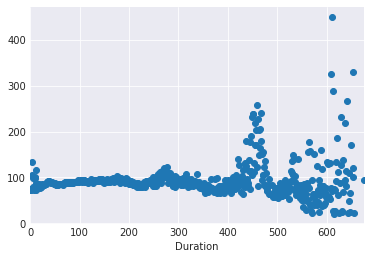

In [20]:
ax = sns.tsplot(time=df2['Duration'], data=df2['DelayTime'], interpolate=False)
plt.show()

In [30]:
df3 = pd.read_sql_query('''
select o.AirTime as Duration, count(*) as AmountOfDelays
    from ontime o
    where o.Year = 2007 and (o.ArrTime - o.CRSArrTime) >= 15
    group by Duration
    ''', conn)
df3

,Duration,AmountOfDelays
0,0,20
1,1,21
2,2,20
3,3,10
4,4,9
5,5,13
6,6,15
7,7,7
8,8,21
9,9,44
